# 펀드소개 대시보드 시각화를 위한 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive, files
drive.mount('/content/drive')


Mounted at /content/drive


[목차]


1. 펀드별 기본정보 확인
2. 파생변수 생성 
3. 펀드별 그룹 요약 통계
4. 펀드별운용성과 데이터 병합 
5. 펀드별 키워드 - 워드클라우드 시각화
6. 펀드별 수익률 - 시계열 그래프 시각화



### 1. 펀드별 기본 정보 확인

In [2]:
mali_data = pd.read_csv('/content/drive/MyDrive/miraeasset/mali_data1.csv')

In [3]:
# 펀드별 고유정보
fund_data = mali_data[['fund_cd', 'fund_price', 'fund_nm', 'fund_set_dt', 'operation_rsk', 'operation_conm', 'fund_expln', 'stck_expln',
                       'finan_bond_expln', 'fund_aset_cd', 'fund_stle_cd', 'insur_as_fund_cd', 'fund_diff_cd', 'finan_bond_cd','feh_cd']]

#### 범주형 변수 라벨 변경 


In [4]:
# 펀드자산구분코드
fund_aset_dict = {1:'국내주식혼합', 2:'국내주식', 3:'국내채권혼합', 4:'국내채권', 5:'포트폴리오',
                  6:'대안투자', 7:'해외주식혼합', 8:'해외주식', 9:'해외채권', 10:'해외채권혼합'}
fund_data['fund_aset_cd'].replace(fund_aset_dict, inplace=True)
mali_data['fund_aset_cd'].replace(fund_aset_dict, inplace=True)

# 펀드스타일구분코드 
fund_stle_dict = {1:'국내인덱스주식', 2:'국내성장주식', 3:'국내가치주식', 4:'국내배당주식', 5:'글로벌주식', 6:'이머징주식',
                  7:'컨슈머주식', 8:'국내배당주식', 9:'국내MMF', 10:'글로벌채권', 11:'이머징채권', 12:'하이일드채권',
                  13:'절대수익형', 14:'원자재', 15:'부동산', 16:'자산배분형', 17:'선진국주식', 18:'선진국채권'}
fund_data['fund_stle_cd'].replace(fund_stle_dict, inplace=True)     
mali_data['fund_stle_cd'].replace(fund_aset_dict, inplace=True)             

In [5]:
# product_cd 
product_dict = {1:'변액연금보험', 2:'변액유니버셜보험'}
mali_data['product_cd'].replace(product_dict, inplace=True)

# age_cd
age_dict = {'00_19':'0~19세', '20_35':'20~35세', '36_40':'36~0세',
               '41_55':'41~55세', '56_70':'56~70세', '71':'71세 이상'}
mali_data['age_cd'].replace(age_dict, inplace=True)

# channel_cd
channel_dict = {1:"보험설계사 통해 가입", 2:"GA영업지점 통해 가입", 3:"방카슈랑스 통해 가입", 4:"온라인 통해 가입"}
mali_data['channel_cd'].replace(channel_dict, inplace=True)

# gender
gender_dict = {0:"남성", 1:"여성"}
mali_data['gender'].replace(gender_dict, inplace=True)

# job_cd
job_dict = {'A':'사무관리직/전문직/공무원', 'B':'제조업현장관리자', 'C':'자영업자/주부/직업군인/일반서비스업종사자/영업사원/제조업현장작업자',
            'D': '보험설계사/학생/의료직종사자/프리랜서', 'E':'위험직군/운수직종/계절적휴업자/건설토목종사자/금속화학종사자'}
mali_data['job_cd'].replace(job_dict, inplace=True)

# loan_ync
loan_yn_dict = {0:"약관대출 없음", 1:"약관대출 있음"}
mali_data['loan_yn'].replace(loan_yn_dict, inplace=True)

# rider
rider_dict = {0:"특약 없음", 1:"특약 있음"}
mali_data['rider'].replace(rider_dict, inplace=True)

#signgu_cd
signgu_dict = {1:'시 거주', 2:'군 거주', 3:'구 거주'}
mali_data['signgu_cd'].replace(signgu_dict, inplace=True)

# pay_prd
pay_prd_dict = {0:'보험료월납', 1:'보험료일시납'}
mali_data['pay_prd'].replace(pay_prd_dict, inplace=True)

# rcpt_cd
rcpt_dict = {0:'소극적 수금', 1:'적극적 수금'}
mali_data['rcpt_cd'].replace(rcpt_dict, inplace=True)

In [6]:
# 연속형 수치 분포 확인
mali_data[[ 'avg_in_fund_amt', 'avg_in_fund_atcnt']].describe()

,avg_in_fund_amt,avg_in_fund_atcnt
count,890237.000000,890237.000000
mean,32.445910,26.365658
std,66.140652,63.043397
min,0.000000,0.000000
25%,4.000000,3.000000
50%,8.000000,5.000000
75%,19.000000,13.000000
max,271.000000,291.000000


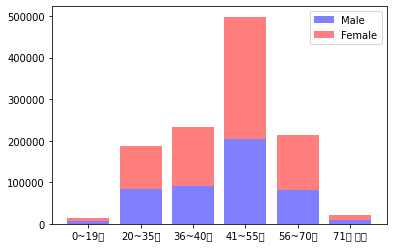

In [7]:
# 성별 연령별 그룹 시각화
label = ['0~19세', '20~35세', '36~40세', '41~55세', '56~70세', '71세 이상']
N = len(mali_data['age_cd'].unique())
index = np.arange(N)
alpha = 0.5

cnt_by_m = mali_data[mali_data['gender']=="남성"].groupby('age_cd').size()
cnt_by_f = mali_data[mali_data['gender']=="여성"].groupby('age_cd').size()

p1 = plt.bar(index, cnt_by_m, color='b', alpha=alpha)
p2 = plt.bar(index, cnt_by_f, color='r', alpha=alpha, bottom=cnt_by_m) # stacked bar chart

plt.xticks(index, label)
plt.legend((p1[0], p2[0]), ('Male', 'Female'))

plt.show()

In [10]:
# 연령분포 시각화를 위한 데이터 추출
age_dist = mali_data[['fund_cd', 'age_cd']]
age_dist.to_csv("/content/drive/MyDrive/miraeasset/대시보드용 데이터/age_dist.csv", index = False, encoding = 'cp949')

### 2. 파생변수 생성

- 펀드별 거래그룹의 유니크 개수 

In [11]:
# 펀드별 거래 그룹 수 
gid_info = ['gid','product_cd', 'age_cd', 'channel_cd', 'gender', 'job_cd','loan_yn', 'rider', 'cntr_cnt', 'signgu_cd', 'avg_cssc',
                      'avg_ch_cntr_cnt', 'cntr_no_cnt', 'pay_prd', 'rcpt_cd', 'avg_max_pay', 'avg_jn_amt', 'sum_fee_amt']

mali_data[gid_info].groupby(mali_data['fund_cd']).size().describe()

count      154.000000
mean      7575.318182
std       6238.848259
min         36.000000
25%       2488.750000
50%       6324.000000
75%      10632.250000
max      26507.000000
dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f1d3cb7b590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1d3c72b5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d3c732610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d3c7320d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1d3c727b10>,
  <matplotlib.lines.Line2D at 0x7f1d3c72b090>]}

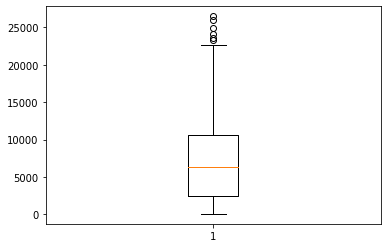

In [12]:
# 펀드별 거래그룹수 분포 Boxplot
fig, ax = plt.subplots()
ax.boxplot(mali_data[gid_info].groupby(mali_data['fund_cd']).size())

In [13]:
gid_cnt = mali_data[gid_info+['fund_cd']].drop_duplicates()
gid_cnt = gid_cnt.groupby(mali_data['fund_cd']).size().to_frame('gid_count').reset_index()

In [14]:
gid_cnt.to_csv("/content/drive/MyDrive/miraeasset/대시보드용 데이터/gid_cnt.csv", index = False, encoding = 'cp949')

In [15]:
fund_data = fund_data.merge(gid_cnt, on='fund_cd', how='left')
mali_data = mali_data.merge(gid_cnt, on='fund_cd', how='left')

###3.  펀드별 그룹 요약통계 
범주형 변수는 최빈값(mod) / 연속형 변수는 평균(mean)

In [16]:
gid_summary = mali_data.groupby('fund_cd').agg(**{
    
    # 범주형
    'mod_product_cd':pd.NamedAgg(column='product_cd', aggfunc=lambda x:x.mode()),
    'mod_age_cd':pd.NamedAgg(column='age_cd', aggfunc=lambda x:x.mode()),
    'mod_channel_cd':pd.NamedAgg(column='channel_cd', aggfunc=lambda x:x.mode()),
    'mod_gender':pd.NamedAgg(column='gender', aggfunc=lambda x:x.mode()),
    'mod_job_cd':pd.NamedAgg(column='job_cd', aggfunc=lambda x:x.mode()),
    'mod_loan_yn':pd.NamedAgg(column='loan_yn', aggfunc=lambda x:x.mode()),
    'mod_rider':pd.NamedAgg(column='rider', aggfunc=lambda x:x.mode()),
    'mod_pay_prd':pd.NamedAgg(column='pay_prd', aggfunc=lambda x:x.mode()),
    'mod_rcpt_cd':pd.NamedAgg(column='rcpt_cd', aggfunc=lambda x:x.mode()),


    # 연속형
    'mean_cntr_cnt':pd.NamedAgg(column='cntr_cnt', aggfunc='mean'),
    'mean_avg_cssc':pd.NamedAgg(column='avg_cssc', aggfunc='mean'),
    'mean_avg_ch_cntr_cnt':pd.NamedAgg(column='avg_ch_cntr_cnt', aggfunc='mean'),
    'mean_cntr_no_cnt':pd.NamedAgg(column='cntr_no_cnt', aggfunc='mean'),
    'mean_avg_max_pay':pd.NamedAgg(column='avg_max_pay', aggfunc='mean'),
    'mean_avg_jn_amt':pd.NamedAgg(column='avg_jn_amt', aggfunc='mean'),
    'mean_sum_fee_amt':pd.NamedAgg(column='sum_fee_amt', aggfunc='mean')
}).reset_index()

gid_summary.head()

,fund_cd,mod_product_cd,mod_age_cd,mod_channel_cd,mod_gender,mod_job_cd,mod_loan_yn,mod_rider,mod_pay_prd,mod_rcpt_cd,mean_cntr_cnt,mean_avg_cssc,mean_avg_ch_cntr_cnt,mean_cntr_no_cnt,mean_avg_max_pay,mean_avg_jn_amt,mean_sum_fee_amt
0,N100,변액연금보험,41~55세,보험설계사 통해 가입,여성,사무관리직/전문직/공무원,약관대출 없음,특약 없음,보험료일시납,적극적 수금,2.222144,710.538548,4.130838,131.144204,88.749578,2735.211733,4580.063731
1,N110,변액유니버셜보험,41~55세,보험설계사 통해 가입,여성,사무관리직/전문직/공무원,약관대출 없음,특약 없음,보험료일시납,적극적 수금,2.104437,793.695023,4.265261,168.275067,66.550380,3817.741358,10821.805344
2,N120,변액연금보험,41~55세,보험설계사 통해 가입,여성,사무관리직/전문직/공무원,약관대출 없음,특약 없음,보험료일시납,적극적 수금,2.276736,758.939361,4.529217,216.248071,85.244763,2982.014333,9750.433297
3,N130,변액유니버셜보험,41~55세,보험설계사 통해 가입,여성,사무관리직/전문직/공무원,약관대출 없음,특약 없음,보험료일시납,적극적 수금,2.149781,760.163787,5.025212,114.284527,67.951069,3375.686245,6196.328976
4,N140,변액유니버셜보험,41~55세,보험설계사 통해 가입,여성,사무관리직/전문직/공무원,약관대출 없음,특약 없음,보험료일시납,적극적 수금,2.241711,804.682935,5.101785,122.514027,60.808602,3628.789937,7054.017737


In [18]:
gid_summary.to_csv("/content/drive/MyDrive/miraeasset/대시보드용 데이터/gid_summary.csv", index = False, encoding = 'cp949')

### 4. 펀드별 운용성과 데이터 병합

In [19]:
# MAP 운용성과 데이터
operation_pf = pd.read_csv('/content/drive/MyDrive/miraeasset/변액펀드MAP_운용성과_20210922.xls.csv', encoding='cp949', skiprows=[0,1,2,3,5])
operation_pf.columns = ['fund_cd', 'fund_nm', '자산군', '세부유형', '위험등급', '주식편입비', '채권편입비', '수익률1개월', '수익률3개월', '수익률6개월',
                        '수익률1년', '수익률3년', '수익률5년', '수익률연초후', '수익률누적', '수익률연평균', '변동성', '순자산(억원)','총자산대비외화자산비중', 
                        '외화자산대비환헤지비율','기준가(원)','전일대비','설정일','펀드소개','운용사명', '수탁사명', '사무관리회사명']
operation_pf = operation_pf.drop(['fund_nm', '자산군', '수익률연초후', '기준가(원)', '설정일', '펀드소개'], axis=1)
operation_pf.head()

,fund_cd,세부유형,위험등급,주식편입비,채권편입비,수익률1개월,수익률3개월,수익률6개월,수익률1년,수익률3년,수익률5년,수익률누적,수익률연평균,변동성,순자산(억원),총자산대비외화자산비중,외화자산대비환헤지비율,전일대비,운용사명,수탁사명,사무관리회사명
0,N140,가치,고위험(2등급),60%~100%,0%~40%,1.31,-3.31,0.32,30.12,28.77,47.51,60.52,6.92,22.90,138,0.00%,0.00%,-0.03,미래에셋자산운용,KB국민은행,미래에셋펀드서비스
1,N1F0,가치,고위험(2등급),0%~100%,0%~40%,1.35,-3.09,0.44,31.13,26.32,42.98,86.49,7.54,23.02,511,0.00%,0.00%,-0.02,미래에셋자산운용,한국씨티은행,미래에셋펀드서비스
2,N110,배당,고위험(2등급),60%~100%,0%~40%,4.31,-1.99,4.57,34.16,41.83,45.44,50.24,5.23,21.57,51,0.00%,0.00%,-0.02,미래에셋자산운용,KB국민은행,미래에셋펀드서비스
3,N1E0,배당,고위험(2등급),0%~100%,0%~40%,3.48,-2.9,3.01,34.55,42.47,57.37,220.88,16.72,20.61,2241,0.00%,0.00%,-0.03,미래에셋자산운용,한국씨티은행,미래에셋펀드서비스
4,N130,인덱스,고위험(2등급),60%~100%,0%~40%,2.18,-4.4,-0.57,29.41,40.28,67.09,66.54,7.02,20.52,289,0.00%,0.00%,-0.02,교보악사자산운용,KB국민은행,미래에셋펀드서비스


In [20]:
fund_data = fund_data.merge(operation_pf, on='fund_cd', how='left')
fund_data.head(2)

,fund_cd,fund_price,fund_nm,fund_set_dt,operation_rsk,operation_conm,fund_expln,stck_expln,finan_bond_expln,fund_aset_cd,fund_stle_cd,insur_as_fund_cd,fund_diff_cd,finan_bond_cd,feh_cd,gid_count,세부유형,위험등급,주식편입비,채권편입비,수익률1개월,수익률3개월,수익률6개월,수익률1년,수익률3년,수익률5년,수익률누적,수익률연평균,변동성,순자산(억원),총자산대비외화자산비중,외화자산대비환헤지비율,전일대비,운용사명,수탁사명,사무관리회사명
0,N2C0,1313.65,아시아인프라,20080415,3,이스트스프링자산운용,자산의 60% 이상을 아시아 국가의 인프라관련 주식 및 아시아국가 인프라 주식을 주...,60% 이상을 아시아 각국의 인프라 산업과 관련된 주식 및 주식형 펀드,"40% 이내에서 현예금(외화 현예금 포함), MMF 등을 포함한 유동성 자산",해외주식,이머징주식,KLVL3400W15,2,2,2,498,이머징,고위험(2등급),0%~100%,0%~40%,1.64,3.14,8.95,17.35,11.9,28.55,50.28,3.74,14.74,68,90.63%,0.00%,-,이스트스프링자산운용,한국씨티은행,미래에셋펀드서비스
1,N5A0,1438.67,MMF형,20040607,5,KB자산운용,"MMF형 펀드, 콜론 등의 단기유동성 금융자산에 90% 이상 투자",투자하지 않음,단기유동성 금융자산,국내채권,국내MMF,KLVL3400V14,4,1,2,1528,단기채권,초저위험(5등급),0%,0%~100%,0.03,0.07,0.14,0.29,2.48,4.81,44.62,2.58,0.07,1802,0.00%,0.00%,-0.01,KB자산운용,한국씨티은행,미래에셋펀드서비스


In [22]:
fund_data.to_csv("/content/drive/MyDrive/miraeasset/대시보드용 데이터/fund_data.csv", index = False, encoding = 'cp949')

### 5. 펀드별 키워드 전처리 
- 펀드코드와 키워드를 연결하여 워드클라우드 시각화가 가능한 데이터 생성

In [23]:
## 키워드 전처리
fund_keyword = pd.read_csv('/content/drive/MyDrive/miraeasset/fund_keyword.csv', encoding='cp949')
fund_keyword['keyword'] = fund_keyword['keyword'].str.replace("'",'')
fund_keyword['keyword'] = fund_keyword['keyword'].str.replace("[",'')
fund_keyword['keyword'] = fund_keyword['keyword'].str.replace("]",'')
#str(fund_keyword['keyword']).split(',')

keyword_list = []
for i in range(len(fund_keyword)):
  string = str(fund_keyword['keyword'][i]).split(',')
  keyword_list.append(string)

In [24]:
keyword_matrix = pd.DataFrame(keyword_list).transpose()
keyword_matrix.columns = fund_keyword['fund_cd'].to_list()
keyword_matrix.transpose

<bound method DataFrame.transpose of      N2C0 N5A0   N1B0    N4C0    N750  ...  N9H0  N250     N9D0  U204     N9E0
0     인프라   단기     기여     고배당      단기  ...    상품    중국      초이스    중국      초이스
1   코로나19   콜론     실적      배당      미국  ...    파생    기업       맥스    인도       맥스
2     아시아   금리     증감      수익      국채  ...    국내    산업   이스트스프링    기업   이스트스프링
3      배당   양도     국내   코로나19      공사  ...    장외    대표       신탁    절반       신탁
4      섹터   증서     가능      안정      정책  ...    수익    규제       증권    인구       보험
5      종식   금융     업종      섹터      표시  ...    지수   플랫폼       집합    대표       증권
6      미국   매수    반도체      종식   인플레이션  ...   대부분    증시       보험    변화       집합
7     재투자   예금     예정      미국     크레딧  ...    증권    이슈       현금    차지       현금
8      국가   우려     부정      자본      경기  ...    확보    이익       안정    적응       안정
9      누적   만기   바이오팜      증식      은행  ...    안정    주요       상품   수혜주       상품

[10 rows x 154 columns]>

In [25]:
x = np.array(fund_keyword['fund_cd'].to_list())
fund_cd_rept_list = np.repeat(x, 10, axis=0)
keyword_rept_list = sum(keyword_list, [])

df = pd.DataFrame({'fund_cd':fund_cd_rept_list, 'keyword':keyword_rept_list})
df.head()

,fund_cd,keyword
0,N2C0,인프라
1,N2C0,코로나19
2,N2C0,아시아
3,N2C0,배당
4,N2C0,섹터


In [27]:
df.to_csv('/content/drive/MyDrive/miraeasset/대시보드용 데이터/fund_keyword_for_wc.csv', index=False, encoding='cp949')

### 6. 펀드별 수익률 추이
펀드의 시기별 수익률 추이를 시계열 그래프로 시각화가 가능한 데이터 생성

In [28]:
yield_series = mali_data.groupby(['fund_cd','base_ym'])[['fund_avg_income_ratio', 'fund_min_income_ratio', 'fund_max_income_ratio']].mean().reset_index()
yield_series.head()

,fund_cd,base_ym,fund_avg_income_ratio,fund_min_income_ratio,fund_max_income_ratio
0,N100,2020-01,15.019002,0.637637,46.261015
1,N100,2020-02,15.551772,0.735844,48.045348
2,N100,2020-03,13.859251,-1.510932,46.643844
3,N100,2020-04,3.588289,-12.818605,33.931429
4,N100,2020-05,9.754067,-6.905261,42.004067


In [29]:
yield_series.to_csv("/content/drive/MyDrive/miraeasset/대시보드용 데이터/yield_series.csv", index = False, encoding = 'cp949')

본 저작물의 저작권은 Apache License v2.0을 따릅니다.